In [7]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plot
from datetime import datetime
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [8]:
df = fdr.DataReader('KS11','2000')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-11-01,2978.94,2984.18,2991.81,2976.87,475380000.0,0.0028
2021-11-02,3013.49,2995.58,3034.30,2995.58,525850000.0,0.0116
2021-11-03,2975.71,3020.36,3020.87,2969.01,658650000.0,-0.0125
2021-11-04,2983.22,3000.92,3011.56,2978.07,772020000.0,0.0025
2021-11-05,2969.27,3003.53,3003.53,2953.96,688030000.0,-0.0047


In [9]:
data = df.reset_index()
data.head()

,Date,Close,Open,High,Low,Volume,Change
0,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301
1,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687
2,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259
3,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126
4,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407


In [10]:
prcp_data = data.rename(columns={'Date': 'ds', 'Close': 'y'})[['ds', 'y']]
prcp_data.head()

,ds,y
0,2000-01-04,1059.04
1,2000-01-05,986.31
2,2000-01-06,960.79
3,2000-01-07,948.65
4,2000-01-10,987.24


In [12]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    n_changepoints=100,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    batch_size=64,
    epochs=50,
    learning_rate=1.0,
)
model.fit(prcp_data, 
          freq='D',
          valid_p=0.2,
          epochs=50)

INFO: nprophet - _handle_missing_data: 2583 missing dates were added.
INFO: nprophet - _handle_missing_data: 2583 NaN values in column y were auto-imputed.
Epoch[50/50]: 100%|█| 50/50 [01:42<00:00,  2.04s/it, SmoothL1Loss=0.000775, MAE


,SmoothL1Loss,MAE,RegLoss
0,0.044874,431.472148,0.0
1,0.001516,95.003474,0.0
2,0.003045,133.767021,0.0
3,0.031752,430.440306,0.0
4,0.289231,1351.384984,0.0
5,0.385150,1566.735371,0.0
6,0.997964,3247.561298,0.0
7,1.689636,5000.288990,0.0
8,2.366638,6633.482316,0.0
9,2.690302,7405.017601,0.0


INFO: nprophet - _handle_missing_data: 2583 missing dates were added.
INFO: nprophet - _handle_missing_data: 2583 NaN values in column y were auto-imputed.


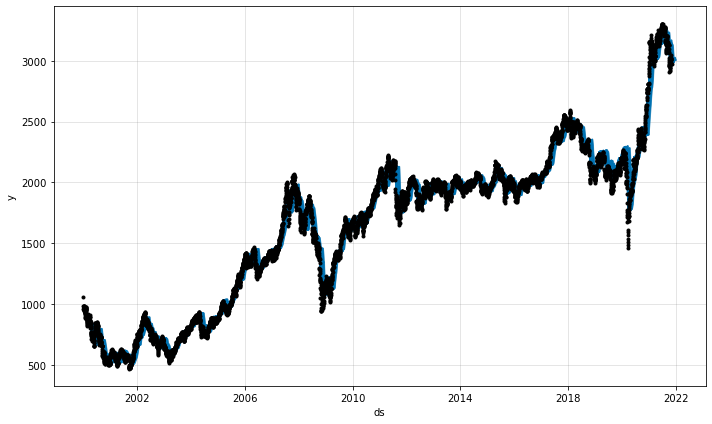

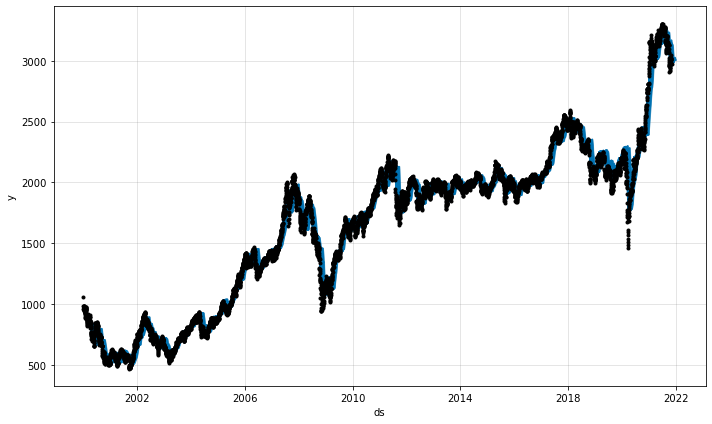

In [13]:
future = model.make_future_dataframe(prcp_data, periods=5, n_historic_predictions=True)
forecast = model.predict(future)
model.plot(forecast)

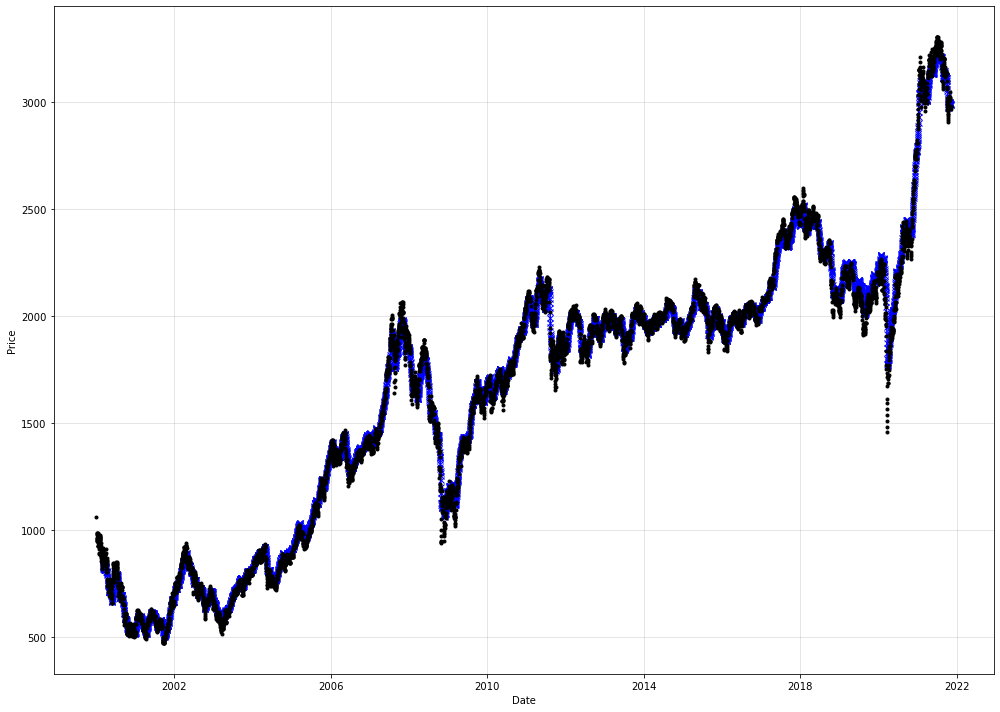

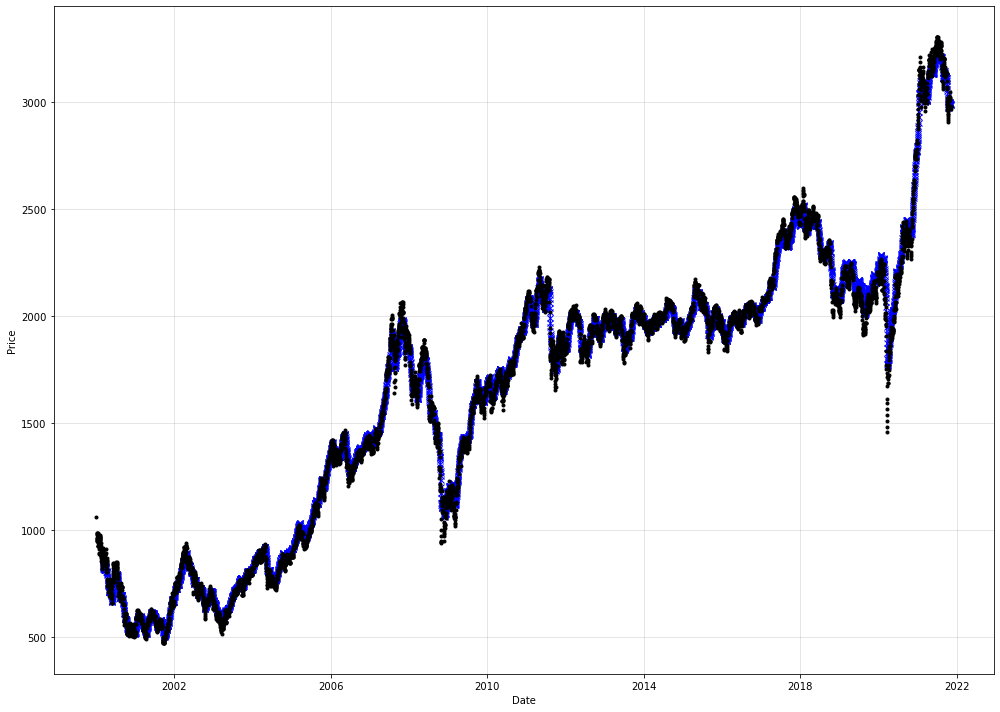

In [16]:
fig, ax = plot.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Price", ax=ax)

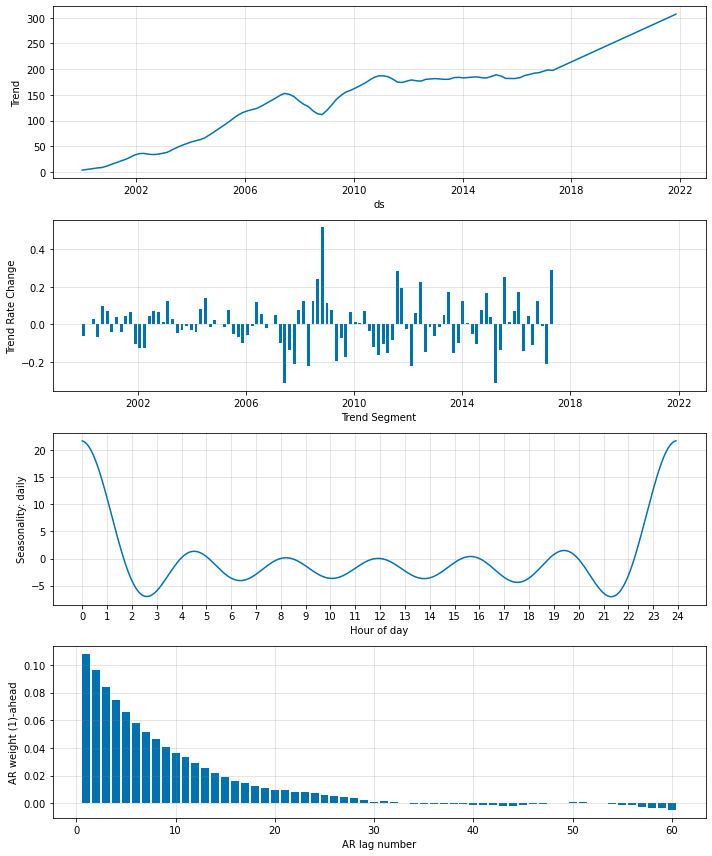

In [15]:
model = model.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = model.plot_parameters()